In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [25]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [27]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [30]:
regressor=Sequential()

In [31]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [33]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [34]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [35]:
regressor.add(Dense(units = 1))

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 63s 63ms/step - loss: 0.0347
Epoch 2/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

In [42]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

KeyError: 2517

In [43]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 256ms/step


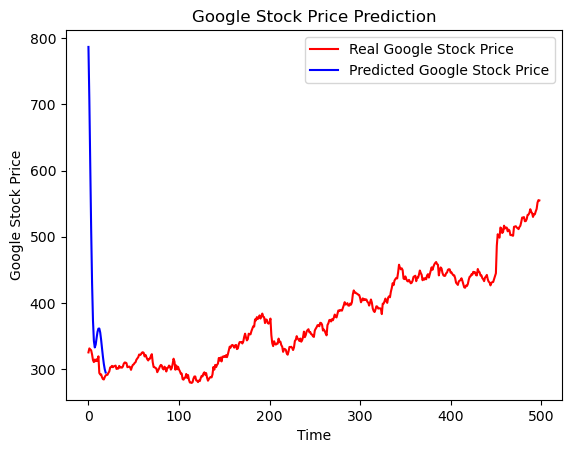

In [44]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()